In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Zomato.xlsx', index_col = 0)
df.head()

,Name,Tag,Type,Location,Address,Rating,Votes,Cuisines,Cost for 2,Features
0,The Black Pearl,SPONSORED,Casual Dining,Koramangala 5th Block,"105, 1st A Cross Road, Jyothi Nivas College R...",4.8,13156 votes,"['North Indian', 'European', 'Mediterranean', ...","₹1,500","['12noon – 4pm, 6pm – 12midnight (Mon-Sun)', ""..."
1,Big Pitcher,SPONSORED,Pub,Old Airport Road,"4121, LR Arcade, Old Airport Road, Bangalore",4.7,11203 votes,"['American', 'Continental', 'North Indian', 'M...","₹1,800","['11am – 1am (Mon-Sun)', ""Microbreweries, Grea..."
2,Truffles,"Café,Casual",Café,Koramangala 5th Block,"28, 4th B Cross, Koramangala 5th Block, Banga...",4.6,16127 votes,"['Cafe', 'American', 'Burger', 'Steak', 'Great...",₹900,"['12noon – 3:30pm, 7pm – 10:30pm (Mon),12noon ..."
3,URU Brewpark,"Bar,Casual",Bar,JP Nagar,"Maratt Estate, 4th Phase, Near Maratt Pimento...",4.4,980 votes,"['Continental', 'Pizza', 'Asian', 'Desserts', ...","₹1,700","['12noon – 12midnight (Mon-Sun)', 'Sneak Peek ..."
4,Byg Brewski Brewing Company,Microbrewery,Microbrewery,Sarjapur Road,"Behind MK Retail, Sarjapur Road, Bangalore",4.9,20921 votes,"['Continental', 'North Indian', 'Italian', 'So...","₹1,600","['12noon – 1am (Mon-Sat),12:30pm – 1am (Sun)',..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811 entries, 0 to 7810
Data columns (total 10 columns):
Name          7811 non-null object
Tag           7811 non-null object
Type          7811 non-null object
Location      7811 non-null object
Address       7811 non-null object
Rating        7811 non-null float64
Votes         7811 non-null object
Cuisines      7811 non-null object
Cost for 2    7811 non-null object
Features      7811 non-null object
dtypes: float64(1), object(9)
memory usage: 671.3+ KB


In [4]:
for column in df.columns:
    print(column + ' : ' + str(df[column].nunique()))

Name : 7327
Tag : 48
Type : 22
Location : 273
Address : 7499
Rating : 30
Votes : 1095
Cuisines : 2739
Cost for 2 : 57
Features : 2549


In [5]:
df['Name'] = df['Name'].str.strip()
df['Tag'] = df['Tag'].str.strip().astype('category')
df['Type'] = df['Type'].str.strip().astype('category')
df['Location'] = df['Location'].str.strip().astype('category')
df['Address'] = df['Address'].str.strip()
df['Rating'] = df['Rating'].astype('category')
df['Votes'] = df['Votes'].str.strip()
df['Cuisines'] = df['Cuisines'].str.strip()
df['Cost for 2'] = df['Cost for 2'].str.strip().astype('category')
df['Features'] = df['Features'].str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811 entries, 0 to 7810
Data columns (total 10 columns):
Name          7811 non-null object
Tag           7811 non-null category
Type          7811 non-null category
Location      7811 non-null category
Address       7811 non-null object
Rating        7811 non-null category
Votes         7811 non-null object
Cuisines      7811 non-null object
Cost for 2    7811 non-null category
Features      7811 non-null object
dtypes: category(5), object(5)
memory usage: 430.9+ KB


In [6]:
df.head()

,Name,Tag,Type,Location,Address,Rating,Votes,Cuisines,Cost for 2,Features
0,The Black Pearl,SPONSORED,Casual Dining,Koramangala 5th Block,"105, 1st A Cross Road, Jyothi Nivas College Ro...",4.8,13156 votes,"['North Indian', 'European', 'Mediterranean', ...","₹1,500","['12noon – 4pm, 6pm – 12midnight (Mon-Sun)', ""..."
1,Big Pitcher,SPONSORED,Pub,Old Airport Road,"4121, LR Arcade, Old Airport Road, Bangalore",4.7,11203 votes,"['American', 'Continental', 'North Indian', 'M...","₹1,800","['11am – 1am (Mon-Sun)', ""Microbreweries, Grea..."
2,Truffles,"Café,Casual",Café,Koramangala 5th Block,"28, 4th B Cross, Koramangala 5th Block, Bangalore",4.6,16127 votes,"['Cafe', 'American', 'Burger', 'Steak', 'Great...",₹900,"['12noon – 3:30pm, 7pm – 10:30pm (Mon),12noon ..."
3,URU Brewpark,"Bar,Casual",Bar,JP Nagar,"Maratt Estate, 4th Phase, Near Maratt Pimento,...",4.4,980 votes,"['Continental', 'Pizza', 'Asian', 'Desserts', ...","₹1,700","['12noon – 12midnight (Mon-Sun)', 'Sneak Peek ..."
4,Byg Brewski Brewing Company,Microbrewery,Microbrewery,Sarjapur Road,"Behind MK Retail, Sarjapur Road, Bangalore",4.9,20921 votes,"['Continental', 'North Indian', 'Italian', 'So...","₹1,600","['12noon – 1am (Mon-Sat),12:30pm – 1am (Sun)',..."


In [17]:
group = df.groupby('Type').count().sort_values('Name', ascending = False)
group

,Name,Tag,Location,Address,Rating,Votes,Cuisines,Cost for 2,Features
Type,,,,,,,,,
Quick Bites,4004,4004,4004,4004,4004,4004,4004,4004,4004
Casual Dining,1835,1835,1835,1835,1835,1835,1835,1835,1835
Café,436,436,436,436,436,436,436,436,436
Beverage Shop,268,268,268,268,268,268,268,268,268
Dessert Parlor,263,263,263,263,263,263,263,263,263
Bakery,222,222,222,222,222,222,222,222,222
Bar,155,155,155,155,155,155,155,155,155
Food Court,99,99,99,99,99,99,99,99,99
Sweet Shop,98,98,98,98,98,98,98,98,98


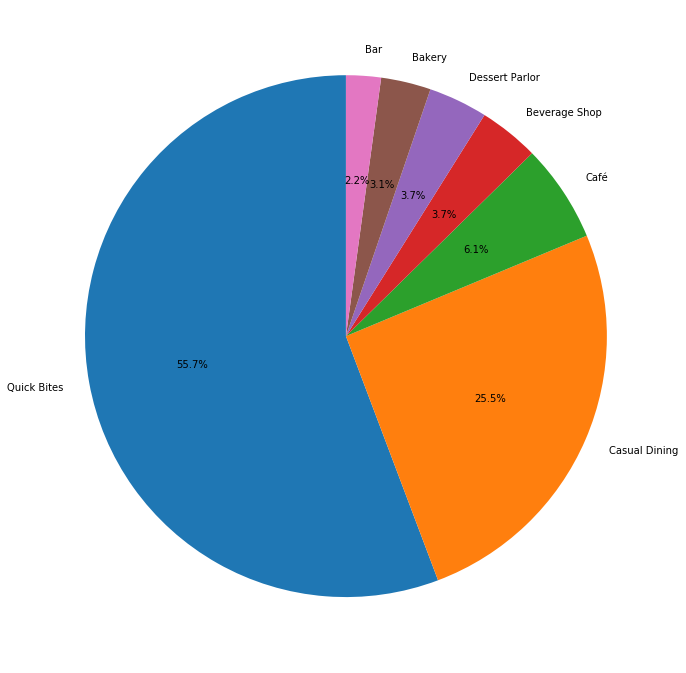

In [21]:
fig1 = plt.figure(1, (12, 12))
ax1 = plt.subplot2grid((1, 1), (0, 0))
ax1.pie(group['Name'].values[:7], labels = group['Name'].index[:7], autopct = '%1.1f%%', startangle = 90)
plt.show()

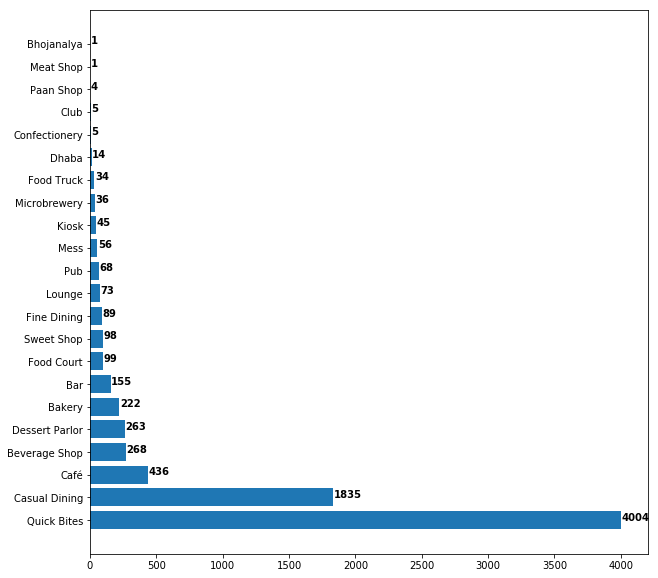

In [32]:
fig2 = plt.figure(2, (10, 10))
ax1 = plt.subplot2grid((1, 1), (0, 0))
ax1.barh(group['Name'].index, group['Name'].values)
#plt.setp(ax1.get_xticklabels(), rotation = 90)
for i, v in enumerate(group['Name'].values):
    ax1.text(v + 3, i, str(v), fontweight = 'bold')
plt.show()

In [29]:
for i, v in enumerate(group['Name'].values):
    print(i, v)

0 4004
1 1835
2 436
3 268
4 263
5 222
6 155
7 99
8 98
9 89
10 73
11 68
12 56
13 45
14 36
15 34
16 14
17 5
18 5
19 4
20 1
21 1


## Food Destination by Geographical Location

In [28]:
group_loc = df.groupby('Location').count().sort_values('Name', ascending = False)
group_loc

,Name,Tag,Type,Address,Rating,Votes,Cuisines,Cost for 2,Features
Location,,,,,,,,,
BTM,388,388,388,388,388,388,388,388,388
Marathahalli,351,351,351,351,351,351,351,351,351
Whitefield,326,326,326,326,326,326,326,326,326
Electronic City,312,312,312,312,312,312,312,312,312
Indiranagar,288,288,288,288,288,288,288,288,288
HSR,276,276,276,276,276,276,276,276,276
JP Nagar,212,212,212,212,212,212,212,212,212
Jayanagar,209,209,209,209,209,209,209,209,209
Banashankari,179,179,179,179,179,179,179,179,179


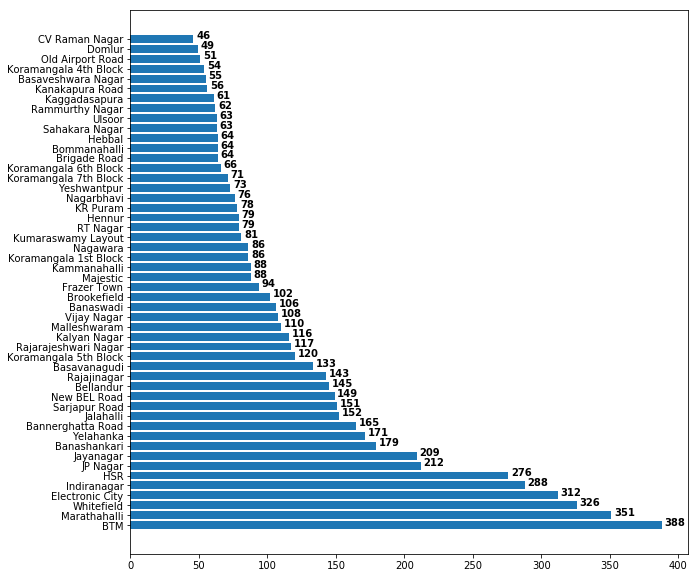

In [36]:
fig3 = plt.figure(3, (10, 10))
ax1 = plt.subplot2grid((1, 1), (0, 0))
ax1.barh(group_loc['Name'].index[:50], group_loc['Name'].values[:50])
for i, v in enumerate(group_loc['Name'].values[: 50]):
    ax1.text(v + 2, i, str(v), fontweight = 'bold')
plt.show()

## Most Top Rated Restauratnt Location

In [75]:
rate_mask = df['Rating'].apply(lambda x : x >=4)
top = df[rate_mask]
group_top = top.groupby(['Location', 'Rating']).count().dropna()
group_top.sort_values('Name', ascending = False)

Name   Tag  Type  \
Location                                     Rating                     
HSR                                          4.0     27.0  27.0  27.0   
Indiranagar                                  4.1     26.0  26.0  26.0   
Jayanagar                                    4.0     25.0  25.0  25.0   
Indiranagar                                  4.2     23.0  23.0  23.0   
BTM                                          4.0     23.0  23.0  23.0   
Indiranagar                                  4.3     22.0  22.0  22.0   
                                             4.0     19.0  19.0  19.0   
JP Nagar                                     4.0     19.0  19.0  19.0   
Kalyan Nagar                                 4.1     17.0  17.0  17.0   
Jayanagar                                    4.2     17.0  17.0  17.0   
Koramangala 5th Block                        4.2     17.0  17.0  17.0   
Whitefield                                   4.0     17.0  17.0  17.0   
Koramangala 5th Block                        4.1     17.0  17.0  17.0   
BTM                                          4.1     16.0  16.0  16.0   
JP Nagar                                     4.1     15.0  15.0  15.0   
HSR                                          4.1     15.0  15.0  15.0   
Jayanagar                                    4.3     14.0  14.0  14.0   
Malleshwaram                                 4.0     14.0  14.0  14.0   
Indiranagar                                  4.4     14.0  14.0  14.0   
New BEL Road                                 4.1     14.0  14.0  14.0   
Banashankari                                 4.0     13.0  13.0  13.0   
Kalyan Nagar                                 4.2     12.0  12.0  12.0   
Whitefield                                   4.1     12.0  12.0  12.0   
Jayanagar                                    4.1     12.0  12.0  12.0   
Koramangala 5th Block                        4.4     12.0  12.0  12.0   
Marathahalli                                 4.0     11.0  11.0  11.0   
Malleshwaram                                 4.1     11.0  11.0  11.0   
Kalyan Nagar                                 4.0     11.0  11.0  11.0   
Electronic City                              4.1     11.0  11.0  11.0   
BTM                                          4.2     11.0  11.0  11.0   
...                                                   ...   ...   ...   
Race Course Road                             4.6      1.0   1.0   1.0   
Old Madras Road                              4.1      1.0   1.0   1.0   
Orion Mall, Malleshwaram                     4.0      1.0   1.0   1.0   
Gokulam Grand Hotel & Spa, New BEL Road      4.2      1.0   1.0   1.0   
Orion Mall, Malleshwaram                     4.2      1.0   1.0   1.0   
                                             4.5      1.0   1.0   1.0   
Palm Meadows Club, Whitefield                4.2      1.0   1.0   1.0   
Phoenix Market City Mall, Whitefield         4.0      1.0   1.0   1.0   
Global Village, Mysore Road                  4.0      1.0   1.0   1.0   
Phoenix Market City Mall, Whitefield         4.6      1.0   1.0   1.0   
Gilly's Redefined, Koramangala 4th Block     4.7      1.0   1.0   1.0   
Race Course Road                             4.1      1.0   1.0   1.0   
                                             4.2      1.0   1.0   1.0   
Gilly's Redefined, Koramangala 4th Block     4.6      1.0   1.0   1.0   
Radisson Bangalore City Centre, Ulsoor       4.4      1.0   1.0   1.0   
Rajarajeshwari Nagar                         4.1      1.0   1.0   1.0   
Radisson Blu Atria                           4.1      1.0   1.0   1.0   
                                             4.3      1.0   1.0   1.0   
Radisson Blu, Marathahalli                   4.2      1.0   1.0   1.0   
Gilly's Redefined, Koramangala 4th Block     4.1      1.0   1.0   1.0   
Radisson Blu, Marathahalli                   4.6      1.0   1.0   1.0   
Garuda Mall, Magrath Road                    4.1      1.0   1.0   1.0   
Frazer Town                           